In [2]:
from PIL import Image

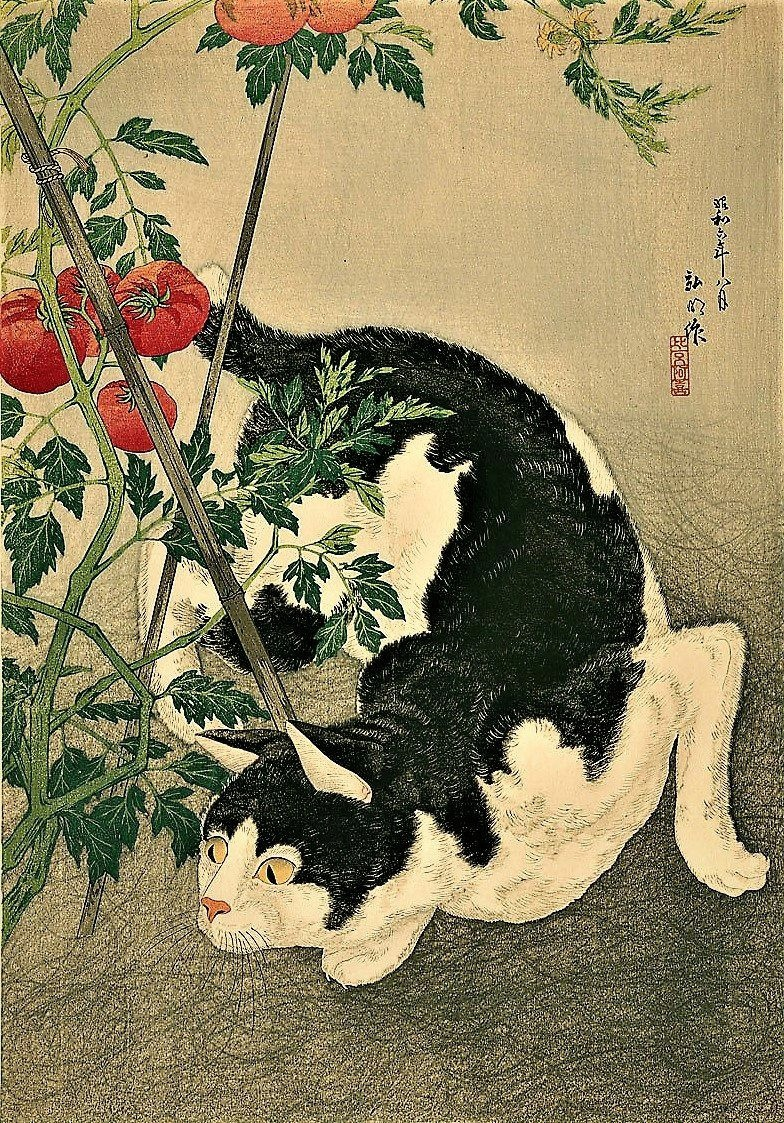

In [3]:
img = Image.open('IojCwyUAdCCXBKsoiGDm4K8oM02mJy2GH1B7IB1iQosxOiegN6E7LFfPkyRxQNu0AM1BRysFskcFZFLK3xIXybgy.jpg')
img

In [4]:
import numpy as np
x = np.array(img, dtype = np.float32)
x.dtype

dtype('float32')

In [5]:
x.shape

(1123, 784, 3)

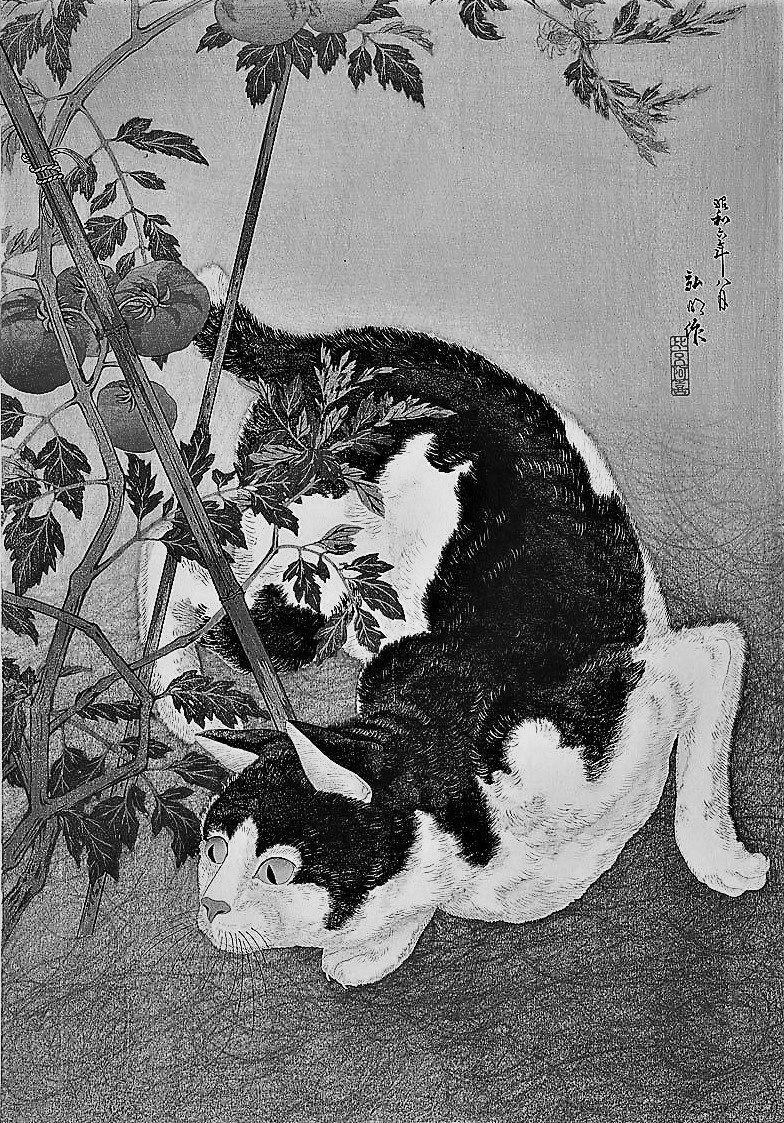

In [6]:
y = Image.fromarray(np.asarray(x.mean(axis=2), dtype = np.uint8))
y

In [7]:
U, S, V = np.linalg.svd(y, full_matrices = False)

In [8]:
U.shape

(1123, 784)

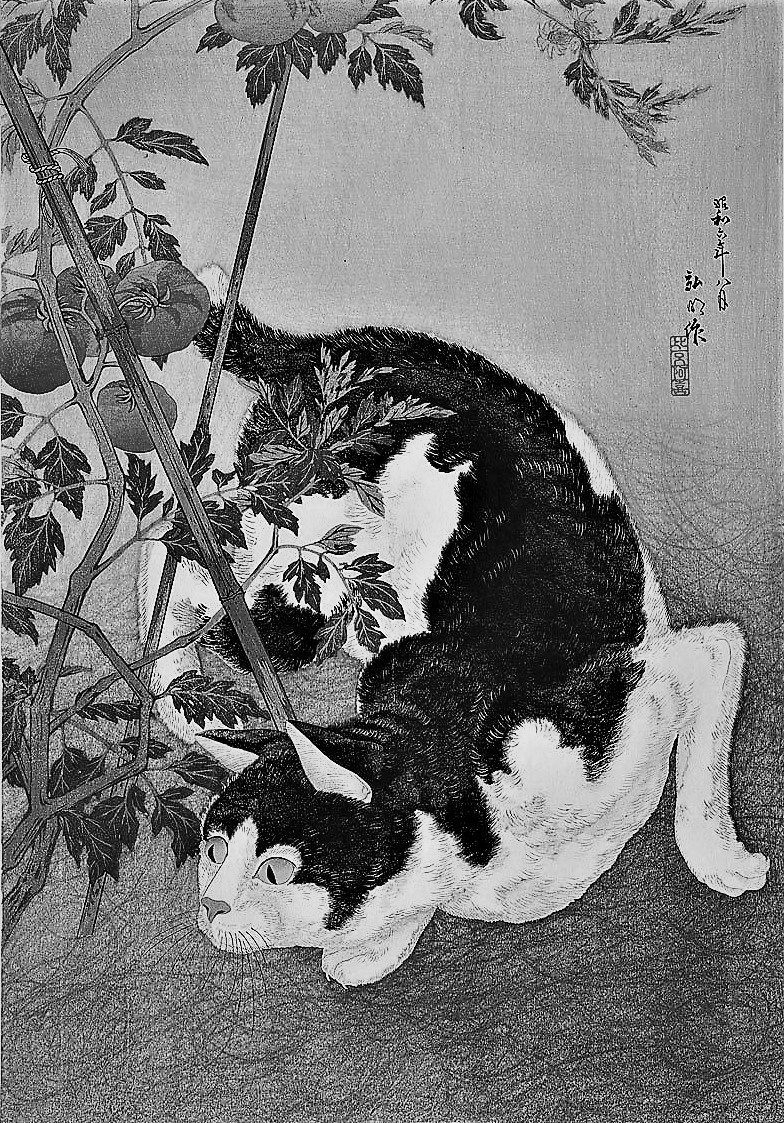

In [9]:
y_full = U.dot(np.diag(S).dot(V))
new_image = Image.fromarray(np.asarray(y_full, dtype = np.uint8))
Image.fromarray(np.asarray(y_full, dtype = np.uint8))

In [10]:
y_full.shape

(1123, 784)

In [11]:
new_image.save('gray.png')

In [12]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

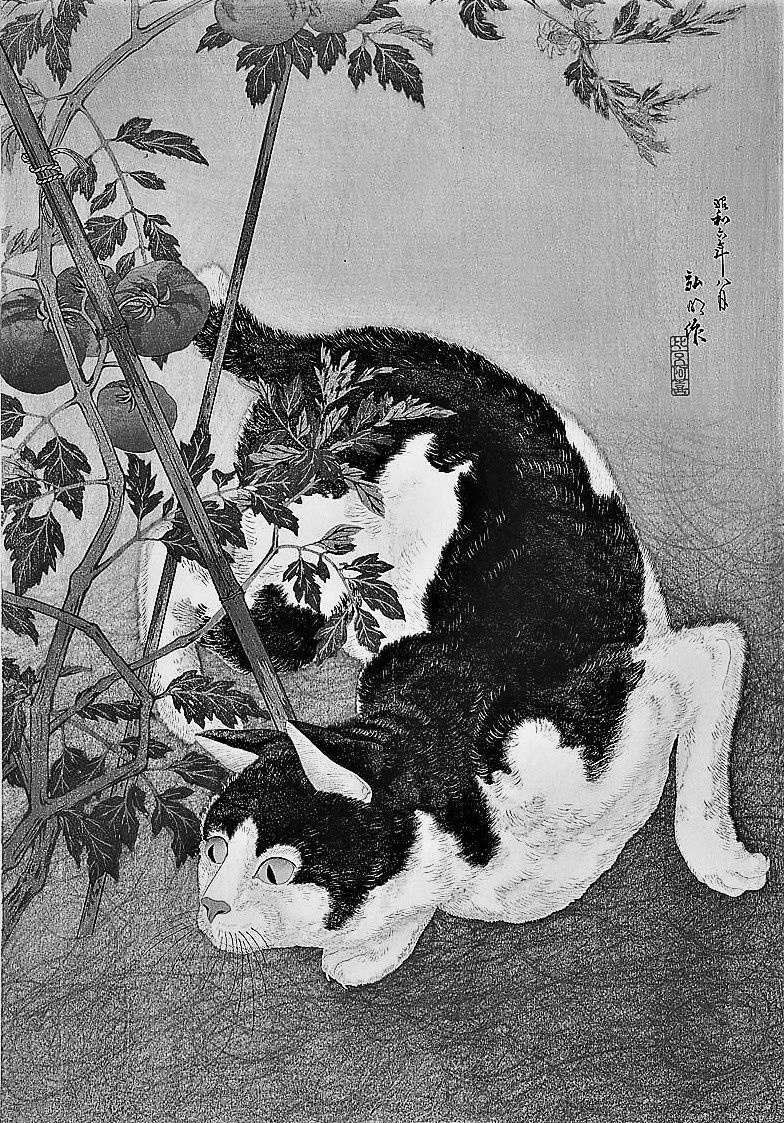

In [13]:
Image.fromarray(np.asarray(rgb2gray(x), dtype=np.uint8))

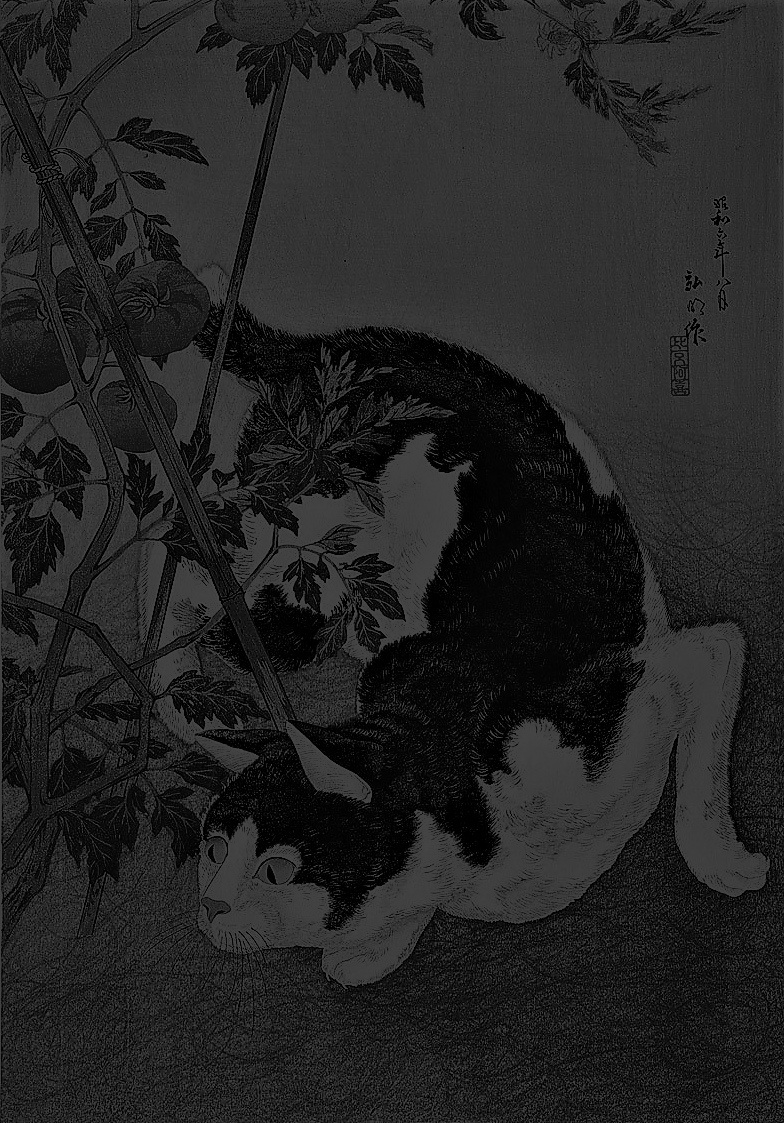

In [14]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.1 * r + 0.1 * g + 0.1 * b

    return gray
Image.fromarray(np.asarray(rgb2gray(x), dtype=np.uint8))

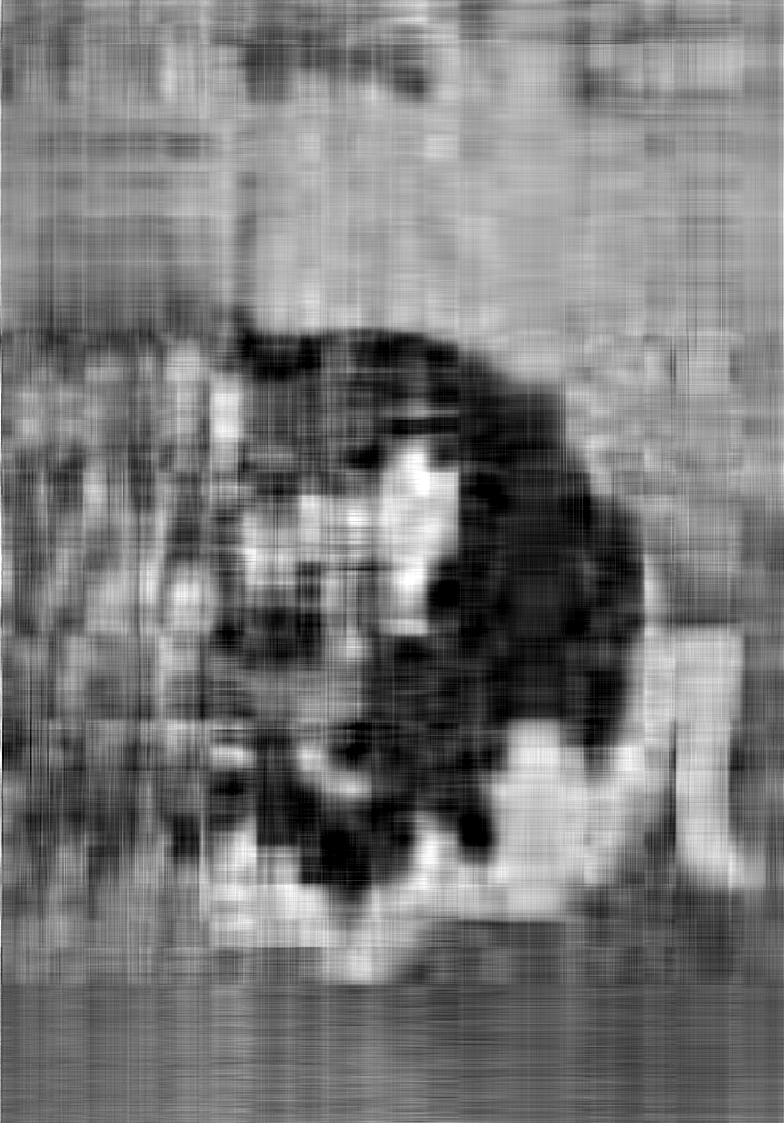

In [15]:
im_compr1 = U[:,:10].dot(np.diag(S[:10])).dot(V[:10,:])
im_compr1[im_compr1 < 0] = 0
im_compr1[im_compr1 > 255] = 255
Image.fromarray(np.asarray(im_compr1, dtype=np.uint8)).save('1.png')
Image.fromarray(np.asarray(im_compr1, dtype=np.uint8))

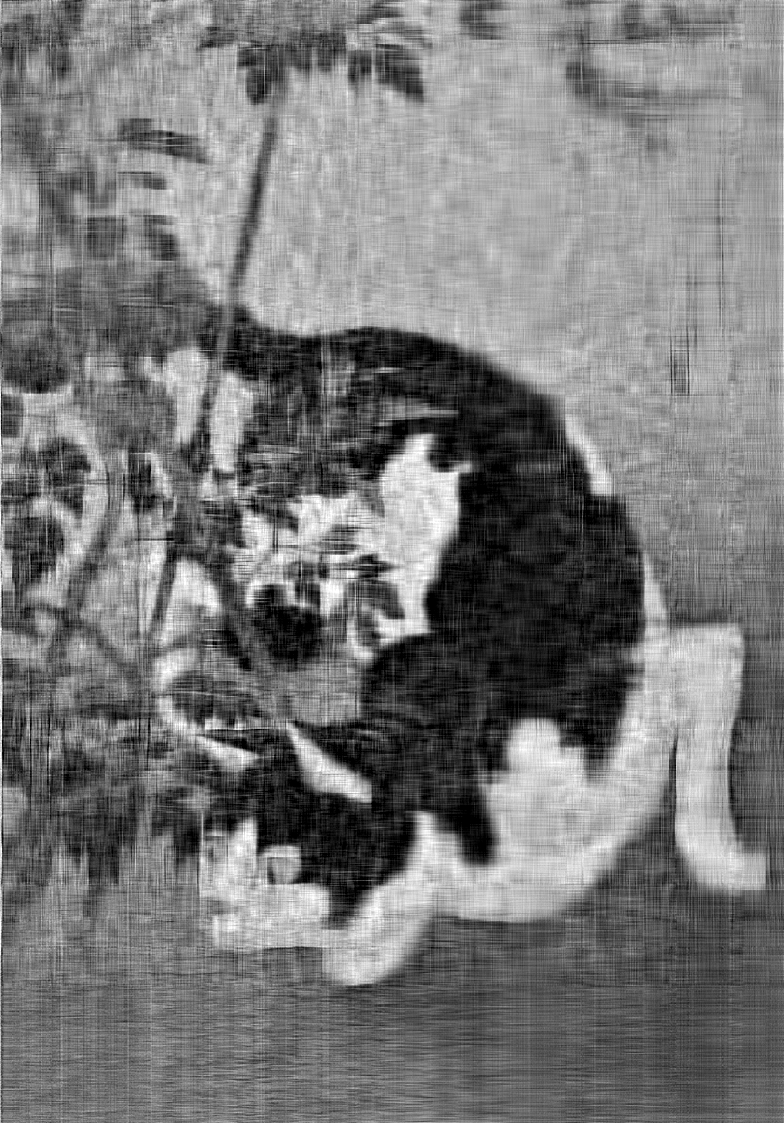

In [16]:
im_compr2 = U[:,:30].dot(np.diag(S[:30])).dot(V[:30,:])
im_compr2[im_compr2 < 0] = 0
im_compr2[im_compr2 > 255] = 255
Image.fromarray(np.asarray(im_compr2, dtype=np.uint8)).save('2.png')
Image.fromarray(np.asarray(im_compr2, dtype=np.uint8))

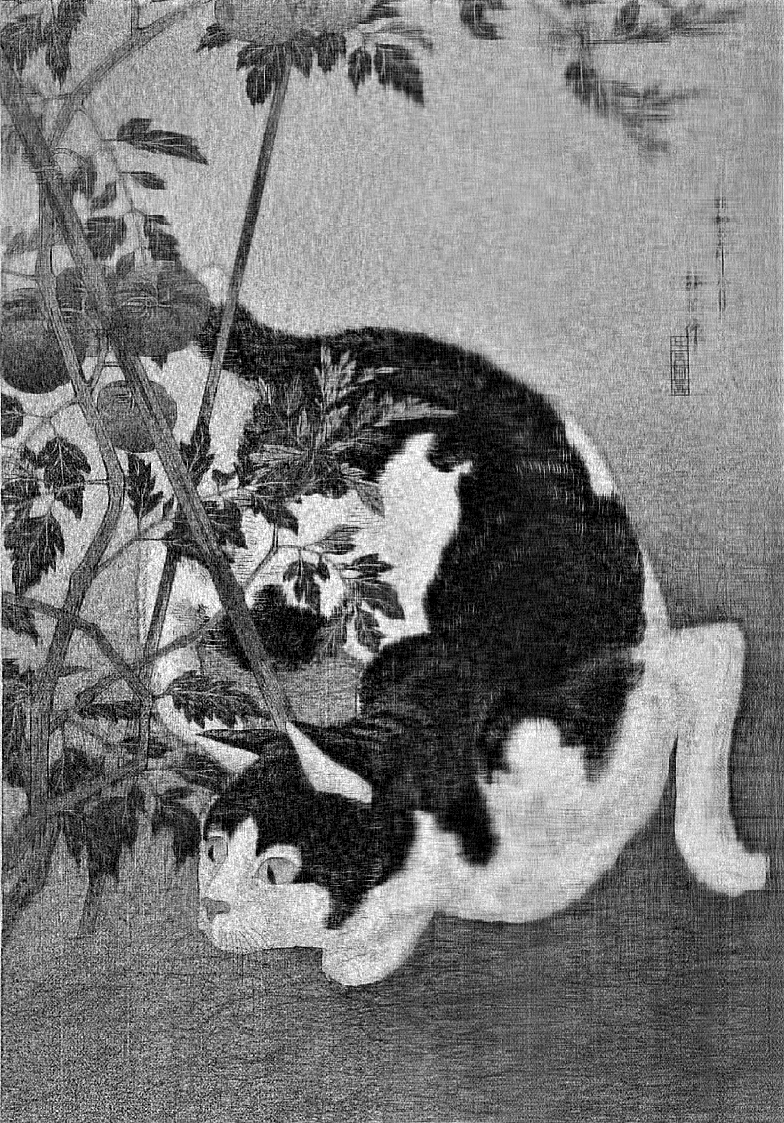

In [17]:
im_compr3 = U[:,:90].dot(np.diag(S[:90])).dot(V[:90,:])
im_compr3[im_compr3 < 0] = 0
im_compr3[im_compr3 > 255] = 255
Image.fromarray(np.asarray(im_compr3, dtype=np.uint8)).save('3.png')
Image.fromarray(np.asarray(im_compr3, dtype=np.uint8))

In [20]:
x = np.array(img, dtype=np.float32)

R, G, B = x[:,:,0], x[:,:,1], x[:,:,2]

In [29]:
Ur, Sr, Vr = np.linalg.svd(R, full_matrices=False)
Ug, Sg, Vg = np.linalg.svd(G, full_matrices=False)
Ub, Sb, Vb = np.linalg.svd(B, full_matrices=False)
for r in [200, 100, 50, 25, 10, 5, 1]:
    Yr = Ur[:, :r].dot(np.diag(Sr[:r])).dot(Vr[:r, :])
    Yr[Yr > 255] = 255
    Yr[Yr < 0] = 0
    Yg = Ug[:, :r].dot(np.diag(Sg[:r])).dot(Vg[:r, :])
    Yg[Yg > 255] = 255
    Yg[Yg < 0] = 0
    Yb = Ub[:, :r].dot(np.diag(Sb[:r])).dot(Vb[:r, :])
    Yb[Yb > 255] = 255
    Yb[Yb < 0] = 0
    Y = np.concatenate((Yr[:,:, np.newaxis], Yg[:,:, np.newaxis], Yb[:,:, np.newaxis]), axis=2)
    Image.fromarray(np.asarray(Y, dtype=np.uint8)).save(f'{r}.png')
    